# Assignment Name: - Clustering
# Assignment Code: - DA-AG-017

# Q.1) What is the difference between K -Means and Hierarchical Clustering? Provide a use case for each.

# Ans: - K-Means: -

*   Partition-based, divides data into l clusters by minimizing within-cluster variance.
*   Requires predefined number of clusters.

*   Works well with laarge datsets.
*   Sensitive to intialization.
# Use Case: - Customer segmentation for an e-commerce website.
# Hierarchical Clustering: -

*   Builds a tree of clusters.
*   Does not require specifying the number of clusters in advance.

*   Better for small datasets or when cluster hierarchy is important.
# Use Case: - Gene sequence analysis where hierarchical relationships are important.











# Q.2) Explain the purpose of the Silhouette Score in evaluating clustering algorithms.

# Ans: - The Silhouette Score is a metric used to evaluate the quality of clustering results without needing ground truth labels.It measures how well each data point fits within its assigned cluster compared to other clusters.
# Purpose: -

*   Evaluate cluster quality: - Tells how well separated and cohesive the clusters are.
*   Compare clustering algorithms: - Helps decide which clustering method (K-Means, DBSCAN) performs better.

*   Choose number of clusters (k): - Useful in methods like K-Means to pick the optimal by maximizing the silhouette score.






# Q.3) What are the core parameters of DBSCAN, and how do they influence the clustering process?

# Ans: - DDBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a powerful clustering algorithm that excels at identifying clusters of arbitrary shape and handling noise.Its behavior is governed by two core parameters.


# eps/epsilon: - The maximum distance between two points for one to be considere the neighborhood of the other.
# Influence: - * Small - only very close points are grouped may result in many small clusters or labeling many points as noise.* Large: - neighborhoods grow larger clusters may merge,reducing the number of clusters.
# MinPts(minimum points): - The minimum number of points required to from a dense region.
# Influence: - * Small MinPts - more clusterd detected but risk of noise being considered a cluster. * Large MinPts: - stricter definition of density fewer larger clusters with more points possibly marked as noise.



# Q.4) Why is feature scaling important when applying clustering algorithms like K-Means and DBSCAN?

# Ans: - Feature scaling is crucial when applying clustering algorithms like K-Means and DBSCAN because both rely heavily on distance calculations to determine cluster membership.
# K-Means and Scaling: - It assigns points to the nearest cluster centroid (based on distance) and centroids are updated as the mean of assigned points.

*   Problem without scaling: - i) Features with larger ranges dominate the distance metric. ii) Example: - Age(0 to 100) vs Income (0 to 1000000) income will overshadow age even if both are equally important.
# DBSCAN and Scaling: - It groups points based on neighborhood distances and density.

*   Problem without scaling: - i) The choice of becomes inconsistent if one feature has a much larger range. ii) Example: - 2D space with Height(150-200cm) and weight(40-120kg) one unit change in height is not comparable to one unit change in weight.
# Benefits of Feature Scaling: -

*   Ensures fairs contribution of all features.
*   Makes distance based comparisons meaningful.

*   Leads to better defined clusters.








# Q.5) What is the Elbow Method in K-Means clustering and how does it help determine the optimal number of clusters?

# Ans: - The Elbow Method is a common tecnique to determine the optimal number of clusters (k) in K-Means clustering.
# How it works: -

*   Rin K-Means for a range of k values (k = 1 to 10)
*   For each k calculate the Within Cluster Sum of Squares (WCSS) also called inertia.

*   Polt WCSS vs k
*   The curve will decrease rapidly at first then level off gradually.
# Why It Helps: -

*   K-Means always reduces WCSS as k increases but to large k may split natural groups unnecessarily.
*   The Elbow Method provides a visual heuristic to pick a meaningful number of clusrers instead of arbitrarily choosing k.







# Q.6) Generate synthetic data using make_blobs(n_samples=300, centers=4),apply KMeans clustering, and visualize the results with cluster centers.

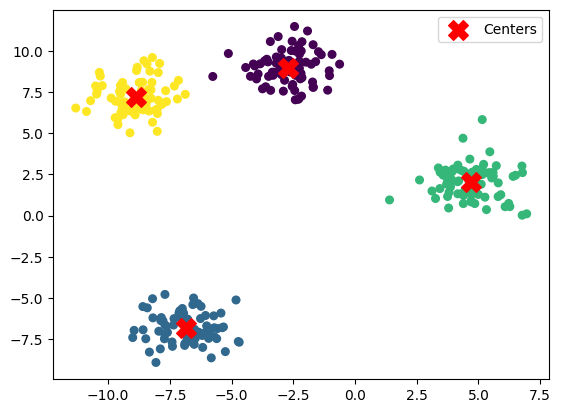

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X, y = make_blobs(n_samples=300, centers=4, random_state=42)

kmeans = KMeans(n_clusters=4, random_state=42)
y_pred = kmeans.fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=y_pred, cmap='viridis', s=30)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            c='red', marker='X', s=200, label='Centers')
plt.legend()
plt.show()

# Q.7) Load the Wine dataset, apply StandardScaler , and then train a DBSCAN model. Print the number of clusters found (excluding noise).

In [ ]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

wine = load_wine()
X = wine.data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan.fit(X_scaled)

labels = dbscan.labels_
num_clusters = len(set(labels)) - (1 if -1 in labels else 0)

print("Number of clusters found:", num_clusters)

Number of clusters found: 0


# Q.8) Generate moon-shaped synthetic data using make_moons(n_samples=200, noise=0.1), apply DBSCAN, and highlight the outliers in the plot.


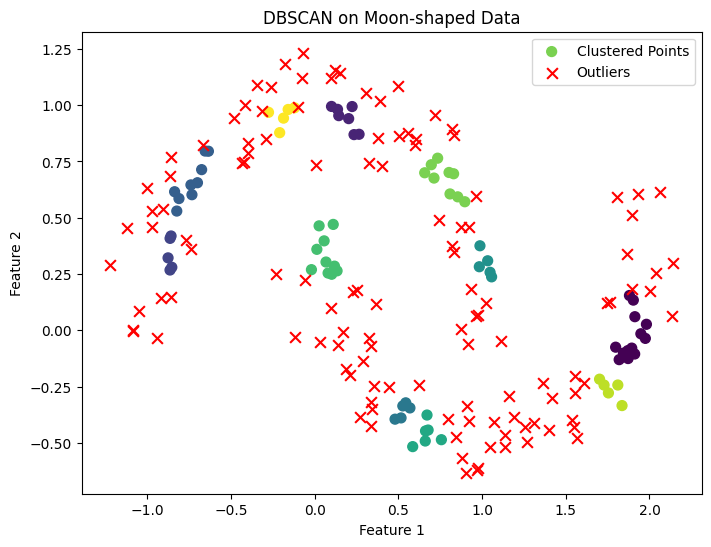

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
X,_ = make_moons(n_samples=200, noise=0.1, random_state=42)

dbscan = DBSCAN(eps=0.1, min_samples=5)
labels = dbscan.fit_predict(X)
outliers = labels == -1
clusters = labels != -1

plt.figure(figsize=(8,6))
plt.scatter(X[clusters, 0], X[clusters, 1], c=labels[clusters], cmap='viridis', s=50, label="Clustered Points")
plt.scatter(X[outliers, 0], X[outliers, 1], c='red', s=60, marker='x', label="Outliers")
plt.title("DBSCAN on Moon-shaped Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

# Q.9) : Load the Wine dataset, reduce it to 2D using PCA, then apply Agglomerative Clustering and visualize the result in 2D with a scatter plot.


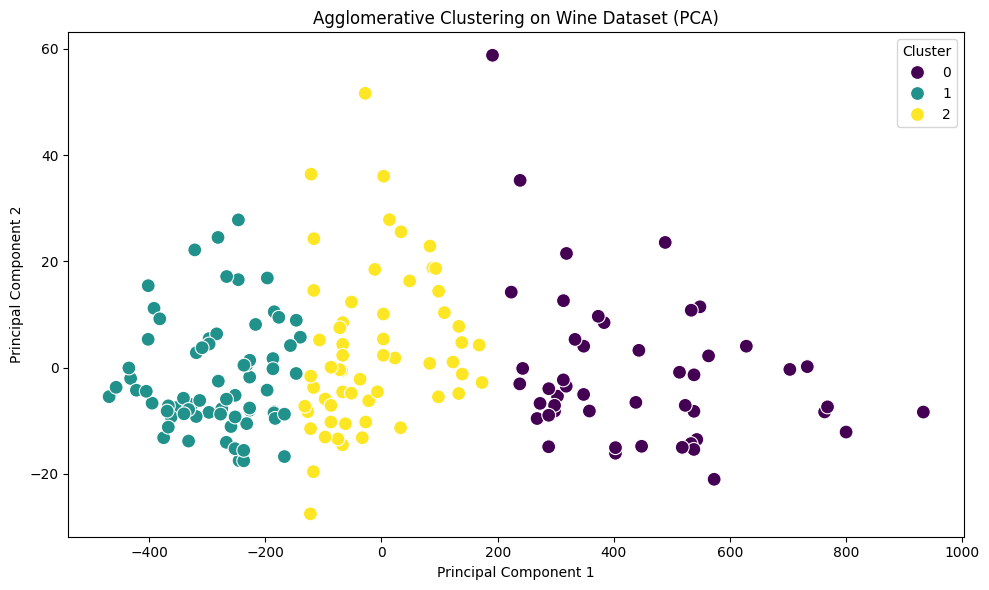

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

wine = load_wine()
X = wine.data

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

agg_clustering = AgglomerativeClustering(n_clusters=3)
labels = agg_clustering.fit_predict(X_pca)
df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
df['Cluster'] = labels

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', s=100)
plt.title('Agglomerative Clustering on Wine Dataset (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

# Q.10) You are working as a data analyst at an e-commerce company. The marketing team wants to segment customers based on their purchasing behavior to run targeted promotions. The dataset contains customer demographics and their product purchase history across categories.
# Describe your real-world data science workflow using clustering: -

*   Which clustering algorithm(s) would you use and why?
*   How would you preprocess the data (missing values, scaling)?

*   How would you determine the number of clusters?
*   How would the marketing team benefit from your clustering analysis?





# Ans:-
# Algorithm Choice: -
1.   K-Means: - Good for well-separated spherical and scalable for large customer datasets.
2.   DBSCAN: - Useful if we expect irregular cluster shapes and want to detect outliers.

3.   Agglomerative Clustering: - Helpful for hierarchical insights.
# Preprocessing the Data: -

1.   Handle Missing Values: - i) Impute numerical features with mean / median. ii) Impute categorical features with mode or use domain knowledge.
2.   Encode Categorical Variables: - Use one hot Encoding or label Encoding.

3.   Feature Scaling: - Use StaandardScaler so that features like "income" and "purchase frequency" are comparable.
# Determining Number of Clusters: -

1.   Elbow Method: - Plot inertia vs number of clusters.

2.   Silhouette Score: - Measures how well each point fits within its cluster.
3.   Domain Knowledge: - Align clusters with marketing personas or business goals.
# Marketing Team Benefits: -

1.   Personalized Promotions: - Target clusters with tailored offers.

2.   Product Recommendations: - Identify clusters that prefer certain categories.
3.   Churn Prediction: - Detect low-engagement clusters that need retention campaigns.
4.   Market Insights: - Understand customer demographics tied to purchasing behavior.














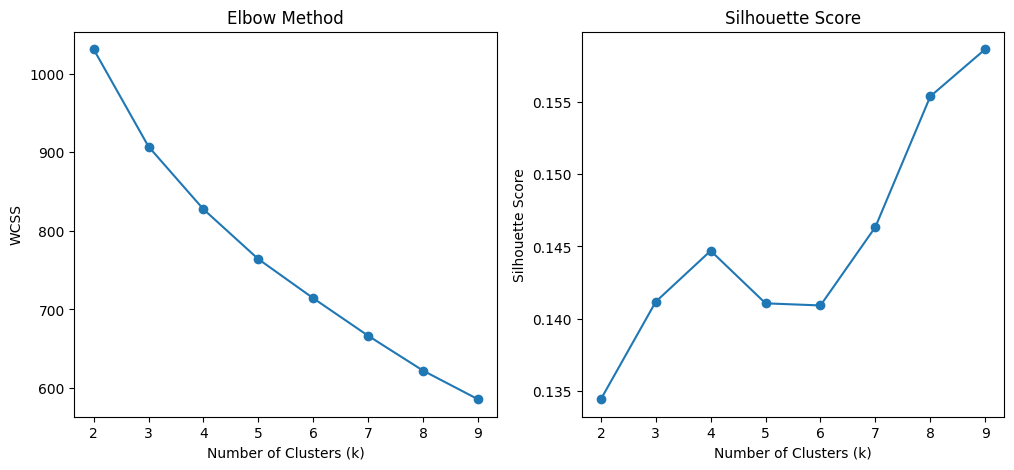

Optimal number of clusters: 9
               age        income  purchase_frequency  electronics_spend  \
cluster                                                                   
0        58.714286  60101.761905           25.285714         572.238095   
1        37.444444  96430.833333           10.722222         759.388889   
2        32.878788  77322.060606           20.606061         561.454545   
3        43.954545  68406.636364            7.136364         798.136364   
4        56.950000  92795.600000           20.200000         296.200000   
5        57.647059  43893.000000           11.176471         223.235294   
6        32.043478  66104.217391            4.000000         176.782609   
7        38.846154  70630.115385           21.115385         322.884615   
8        43.000000  38455.600000           14.900000         586.800000   

         fashion_spend  grocery_spend  
cluster                                
0           388.714286     540.476190  
1           329.833333  

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

np.random.seed(42)
data = pd.DataFrame({
    "age": np.random.randint(18, 70, 200),
    "income": np.random.randint(20000, 120000, 200),
    "purchase_frequency": np.random.randint(1, 30, 200),
    "electronics_spend": np.random.randint(0, 1000, 200),
    "fashion_spend": np.random.randint(0, 1000, 200),
    "grocery_spend": np.random.randint(0, 1000, 200)
})

imputer = SimpleImputer(strategy="median")
X_imputed = imputer.fit_transform(data)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

wcss = []
silhouette_scores = []
K = range(2, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
plt.plot(K,wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")

plt.subplot(1,2,2)
plt.plot(K, silhouette_scores, marker='o')
plt.title("Silhouette Score")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.show()

optimal_k = silhouette_scores.index(max(silhouette_scores)) + 2
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
final_labels = final_kmeans.fit_predict(X_scaled)

data["cluster"] = final_labels

print("Optimal number of clusters:", optimal_k)
print(data.groupby("cluster").mean())